In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import MDS, Isomap
from sklearn.manifold import LocallyLinearEmbedding as LLE
import glob
from PIL import Image
import cv2
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import warnings

# Methods definitions

In [2]:
def perform_pca(data, number_of_components=None, scale=False):
    
    if scale:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)

    pca = PCA(n_components=number_of_components)
    components = pca.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    
    return components_dataframe, pca

def perform_kernel_pca(data, number_of_components=None, scale=False):
    
    if scale:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)

    kpca = KernelPCA(kernel="rbf", n_components=number_of_components)
    components = kpca.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    
    return components_dataframe, kpca

def perform_mds(data, number_of_components, scale=False):
    # performing mds
    #MDS(n_components=2, metric=True, n_init=4, max_iter=300, verbose=0, 
    #eps=0.001, n_jobs=None, random_state=None, dissimilarity=’euclidean’)[source]
    
    if scale:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)
    
    mds = MDS(n_components=number_of_components)
    components = mds.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    return components_dataframe, mds

def perform_isomap(data, number_of_neighbors, number_of_components, scale=False):
    
    if scale:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)
    
    iso = Isomap(n_neighbors=number_of_neighbors,n_components=number_of_components)
    components = iso.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    return components_dataframe, iso

def perform_lle(data, number_of_neighbors, number_of_components, scale=False):
    
    if scale:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)
    
    lle = LLE(n_neighbors=number_of_neighbors,n_components=number_of_components)
    components = lle.fit_transform(data)
    components_dataframe = pd.DataFrame(data=components)
    return components_dataframe, lle

# Display functions

In [3]:
def display_data_with_colors(data, method_num=1, doScale=False,num_of_neighbors=5, dims=2, plot_kwargs={}):
    if method_num == 1:
        components_dataframe, methodUsed = perform_pca(data, scale=doScale)
        plt.title('PCA')
    elif method_num == 2:
        components_dataframe, methodUsed = perform_kernel_pca(data, scale=doScale)
        plt.title('Kernel PCA')
    elif method_num == 3:
        components_dataframe, methodUsed = perform_mds(data,number_of_components=dims, scale=doScale)
        plt.title('MDS')
    elif method_num == 4:
        components_dataframe, methodUsed = perform_isomap(data,num_of_neighbors, number_of_components=dims, scale=doScale)
        plt.title('Isomap')
    else:
        components_dataframe, methodUsed = perform_lle(data, num_of_neighbors, number_of_components=dims,scale=doScale)
        plt.title('LLE')
        
    if dims == 2:       
        if method_num != 1:
            plt.close()
        plt.scatter(components_dataframe[0], components_dataframe[1], **plot_kwargs)
        plt.xlabel("PC 1")
        plt.ylabel("PC 2")  
        plt.show()
    
    elif dims == 3:
        plt.close()
        ax = plt.axes(projection='3d')   
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 2')
        ax.set_zlabel('PC 3')
        ax.scatter3D(components_dataframe[0], components_dataframe[1], components_dataframe[2], **plot_kwargs);  
        plt.show()
    return components_dataframe, methodUsed

# Data preparation

In [4]:
data = pd.read_csv('datasets/Reuters_56k_PCA.csv')
data = data.sample(1500)
class_list = list(data.iloc[:,-1])
data.head()

,0.227411,0.0025741,-0.0825941,0.269994,-0.0793484,-0.40518,-0.71788,0.895774,0.0975026,0.156407,...,-0.162193,-0.43066,-0.24929,0.0299884,0.0990274,-0.444548,-0.13694,0.00377834,0.156475,C12
15875,-0.320416,2.880900,1.747270,-0.091177,0.625657,-1.599070,0.528665,-0.102173,-2.058300,0.976025,...,0.399860,0.417061,0.254894,0.310379,-0.089887,-0.435168,-0.636540,0.058917,0.262015,C151
6694,-0.335403,2.219310,0.432312,-0.058561,0.361272,-0.958390,-0.099942,0.075340,0.075441,-0.475390,...,-0.089828,-0.242000,-0.103621,0.130064,-0.212432,-0.069819,-0.199892,-0.241613,0.135800,C151
45954,-0.090599,-0.389859,-0.235237,0.087841,-0.850914,0.998682,2.453680,0.989582,-0.523695,-0.270402,...,-0.067395,-0.333549,-0.236390,-1.964360,-0.457834,-0.443998,-0.118363,-0.706577,0.140228,M131
5690,0.099622,1.139560,1.262460,-0.024021,0.423225,-0.374258,-0.195493,-0.929687,1.765650,0.426014,...,-0.396273,0.049247,0.188764,-0.188991,0.136823,0.295506,0.114192,-0.062938,-0.141985,C151
1168,0.069305,0.211309,-0.088223,0.413231,-0.156844,-0.089255,-0.255724,0.838027,0.086422,0.044140,...,-0.255746,-0.211009,-0.299227,0.103656,-0.064995,-0.108447,0.112439,0.089859,-0.058139,C12


In [5]:
categoriesOrigin = data.T.tail(1)
categoriesOrigin = categoriesOrigin.iloc[0].tolist()
categories = list(set(categoriesOrigin))
data = data.iloc[:, :-1]

In [6]:
colors_dict = {
    '  E212': 'red',
    '  ECAT': 'blue',
    '  C12': 'green',
     '  GDIS': 'black',
    '  M143': 'orange',
    '  G154': 'purple',
    '  M131': 'grey',
    '  C151': 'brown'
    
}

colors = [colors_dict[c] for c in categoriesOrigin]
plot_setting = {
    's': 3,
    'c': colors
}

# Display without scaling (change arguments for scaled)

<IPython.core.display.Javascript object>


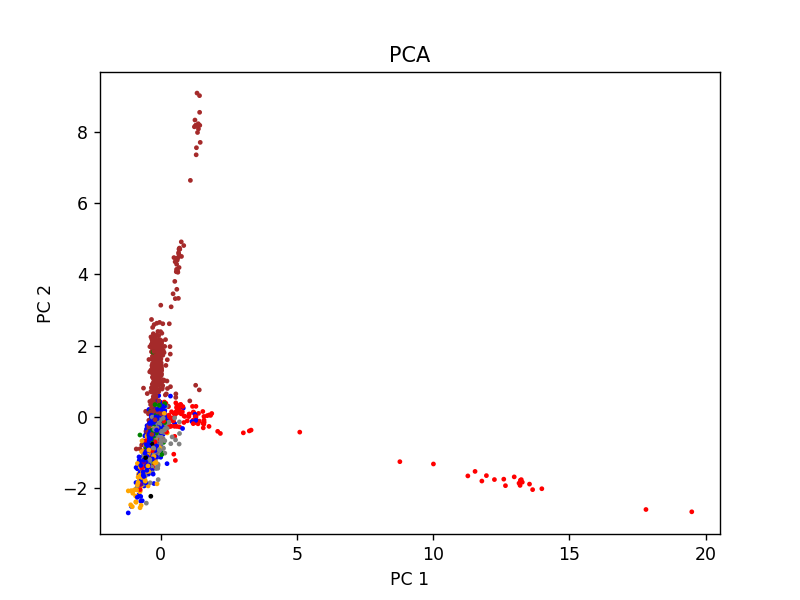

In [7]:
%matplotlib notebook
components, pca = display_data_with_colors(data,method_num=1, dims=2, plot_kwargs=plot_setting) #pca
#display_data_with_colors(data,method_num=1, dims=2, doScale=True, plot_kwargs=plot_setting) #scaled

<IPython.core.display.Javascript object>


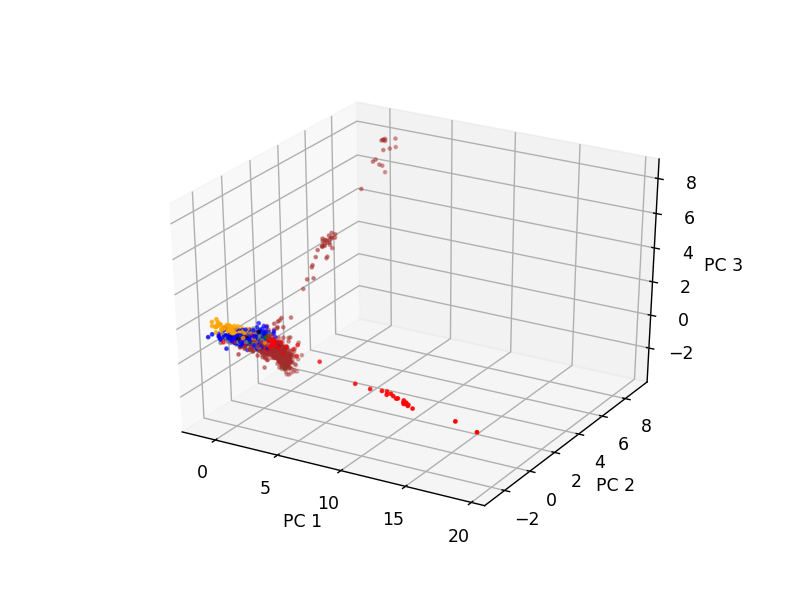

In [8]:
components, pca = display_data_with_colors(data,method_num=1, dims=3, plot_kwargs=plot_setting) #pca
#display_data_with_colors(data,method_num=1, dims=3, doScale=True, plot_kwargs=plot_setting) #pca

<IPython.core.display.Javascript object>


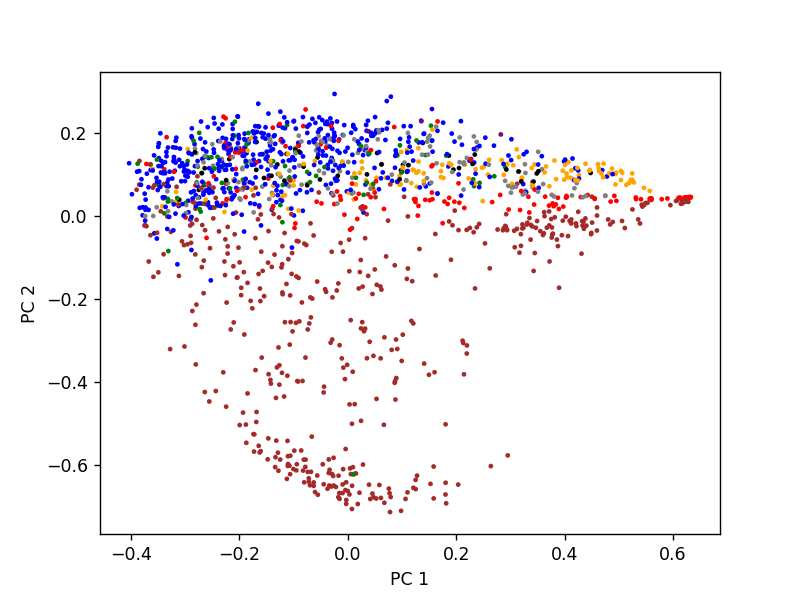

In [9]:
components, kpca = display_data_with_colors(data,method_num=2, dims=2,plot_kwargs=plot_setting) #kernel pca
#display_data_with_colors(data,method_num=2, dims=2, doScale=True, plot_kwargs=plot_setting) #scaled

<IPython.core.display.Javascript object>


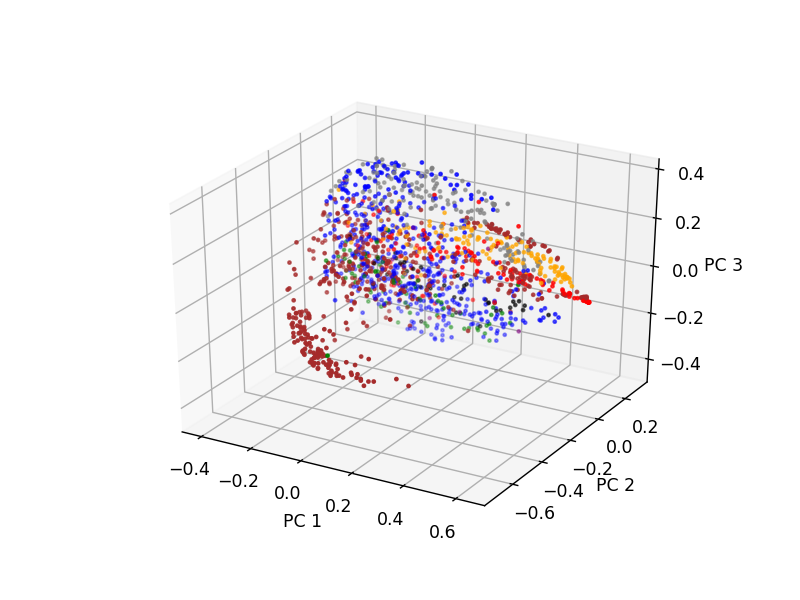

In [10]:
components, kpc = display_data_with_colors(data,method_num=2, dims=3, plot_kwargs=plot_setting) #kernel pca
#display_data_with_colors(data,method_num=2, dims=3, doScale=True, plot_kwargs=plot_setting) #kernel pca

<IPython.core.display.Javascript object>


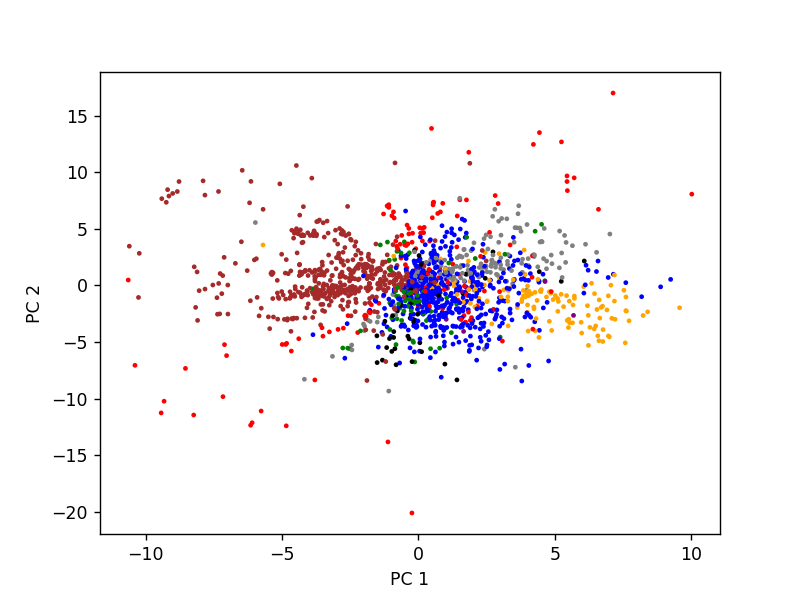

In [11]:
components, mds = display_data_with_colors(data,method_num=3, dims=2,plot_kwargs=plot_setting) #mds
#display_data_with_colors(data,method_num=3, dims=2,doScale=True,plot_kwargs=plot_setting) #scaled

<IPython.core.display.Javascript object>


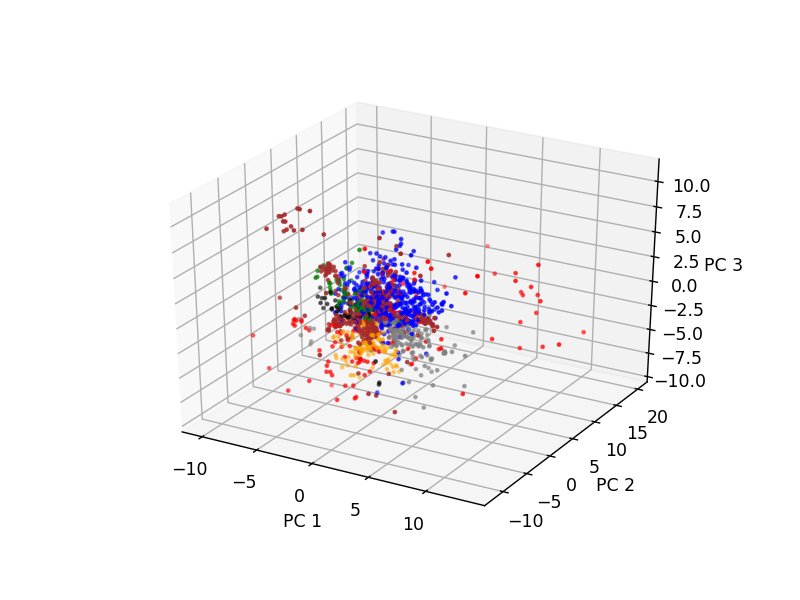

In [12]:
components, mds = display_data_with_colors(data,method_num=3, dims=3, plot_kwargs=plot_setting) #mds
#display_data_with_colors(data,method_num=3, dims=3, doScale=True, plot_kwargs=plot_setting) #scaled

<IPython.core.display.Javascript object>


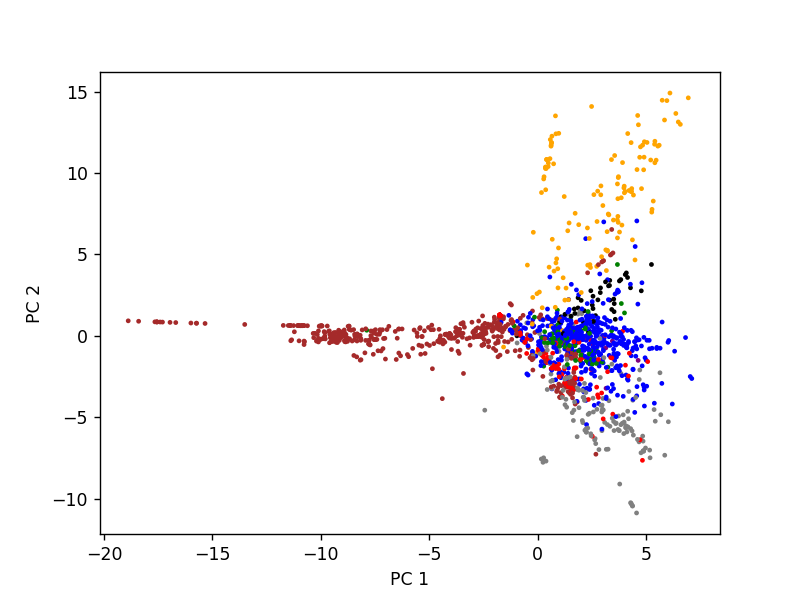

In [13]:
components, isomap = display_data_with_colors(data,method_num=4, dims=2,plot_kwargs=plot_setting) #isomap
#display_data_with_colors(data,method_num=4, dims=2,doScale=True, plot_kwargs=plot_setting) #scaled

<IPython.core.display.Javascript object>


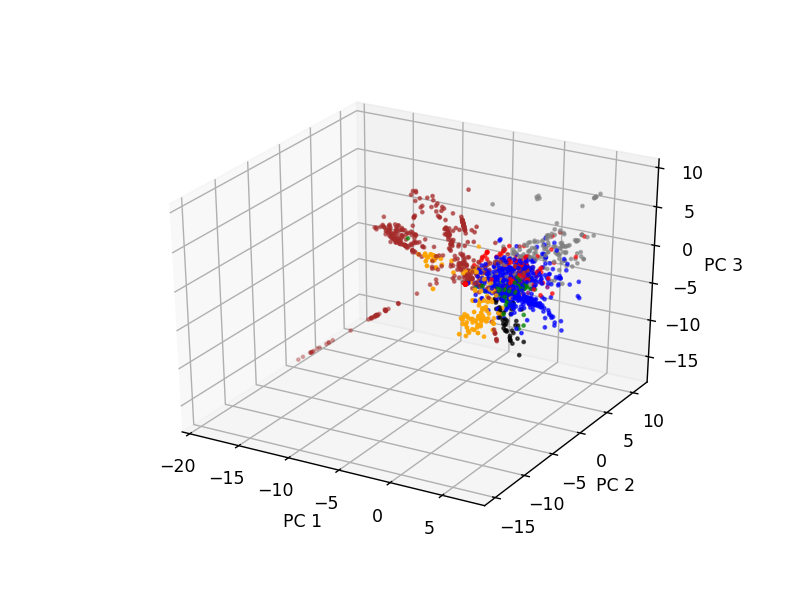

In [14]:
components, isomap = display_data_with_colors(data,method_num=4, dims=3, plot_kwargs=plot_setting) #isomap
#display_data_with_colors(data,method_num=4, dims=3, doScale=True, plot_kwargs=plot_setting) #scaled

<IPython.core.display.Javascript object>


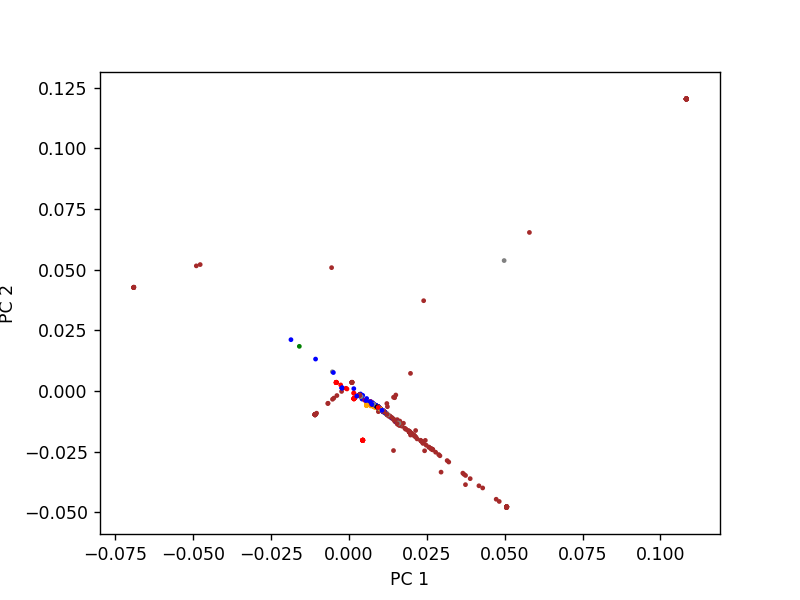

In [15]:
components, lle = display_data_with_colors(data,method_num=5, dims=2,plot_kwargs=plot_setting) #lle

<IPython.core.display.Javascript object>


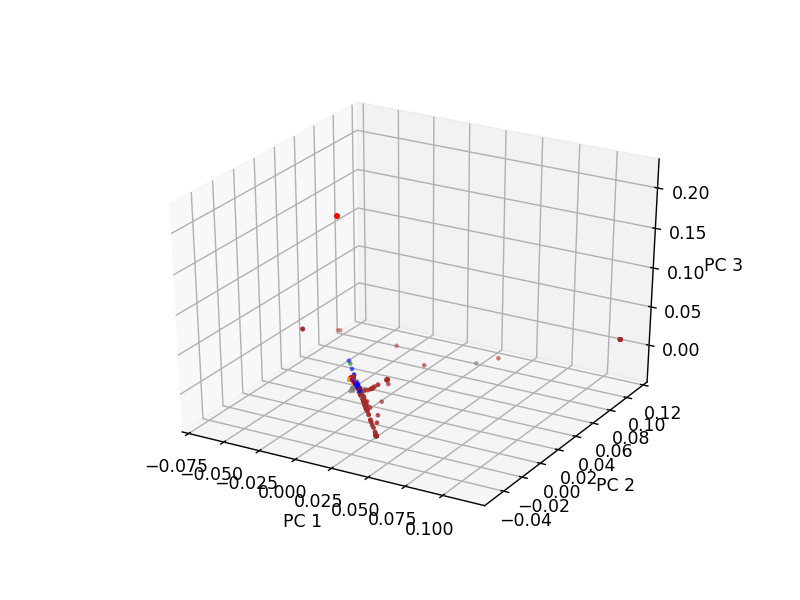

In [16]:
components, lle = display_data_with_colors(data,method_num=5, dims=3, plot_kwargs=plot_setting) #lle

# K nearest neighbours

In [17]:
def knn_stats(samples, labels, n_neighbours):
    nbrs = NearestNeighbors(n_neighbours, algorithm='brute').fit(samples)
    distances, indices = nbrs.kneighbors(samples)
    
    neighbour_stats = []
    
    for index, neighbours in enumerate(indices):
        same_cluster_neighbours = filter(
            lambda neighbour: labels[neighbour] == labels[index],
            neighbours
        )
        neighbour_stats.append(len(list(same_cluster_neighbours)))
        
    return neighbour_stats

In [18]:
components_pca, pca = perform_pca(data, 2)
components_kpca, kpca = perform_kernel_pca(data, 2)
components_mds, mds = perform_mds(data, 2)
components_iso, iso = perform_isomap(data, 2, 5)
components_lle, lle = perform_lle(data, 5, 2)

In [19]:
nbors = 15
stats = knn_stats(components_pca, class_list, nbors)
print('pca: ', np.mean(stats), 'out of ', nbors, ' neighbors')

stats = knn_stats(components_kpca, class_list, nbors)
print('kpca: ', np.mean(stats), 'out of ', nbors, ' neighbors')

stats = knn_stats(components_mds, class_list, nbors)
print('mds: ', np.mean(stats), 'out of ', nbors, ' neighbors')

stats = knn_stats(components_iso, class_list, nbors)
print('isomap: ', np.mean(stats), 'out of ', nbors, ' neighbors')

stats = knn_stats(components_lle, class_list, nbors)
print('lle: ', np.mean(stats), 'out of ', nbors, ' neighbors')

pca:  8.682666666666666 out of  15  neighbors
kpca:  8.396 out of  15  neighbors
mds:  9.26 out of  15  neighbors
isomap:  10.668 out of  15  neighbors
lle:  8.638 out of  15  neighbors
